<a href="https://colab.research.google.com/github/joseluisspindola/RegresionNoLineal/blob/main/Actividad_2_Regresi%C3%B3n_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data2 = pd.read_csv('Datos_limpios.csv', encoding='latin-1')
data2.head(5)

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,last_scraped,source,name,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,has_availability,calendar_last_scraped,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,0,35797.0,153786,94.2,88.9,1.0,1.0,19.38283,-99.27178,2,3799.0,1,7,1.0,7.0,29,59,89,364,0,0,0,188,0,0,1,1,0,0,26/06/2025,city scrape,Villa Dante,Dici,28/06/2010,"Mexico City, Mexico",Sin tiempo de respuesta promedio,0,Sin informaciÃ³n del vecindario,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Resort access"", ""Hot water"", ""Cou...",1.0,1.0,7.0,7.0,t,26/06/2025,0.0,No hay fechas,No hay fechas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,f,50.00
1,1,44616.0,196253,100.0,91.0,13.0,13.0,19.41162,-99.17794,14,18000.0,1,180,1.0,180.0,29,59,89,360,65,1,0,179,0,6,9,4,2,0,01/07/2025,city scrape,Condesa Haus,Fernando,09/08/2010,"Mexico City, Mexico",within an hour,0,Condesa,"['email', 'phone', 'work_email']",t,t,Sin informacion,CuauhtÃÂ©moc,Entire home,Entire home/apt,5.5,5.5 baths,5.0,8.0,"[""Free street parking"", ""Free parking on premi...",1.0,1.0,180.0,180.0,t,01/07/2025,108000.0,09/11/2011,01/01/2025,4.59,4.56,4.70,4.87,4.78,4.98,4.47,f,0.39
2,2,56074.0,265650,100.0,100.0,1.0,5.0,19.43977,-99.15605,2,585.0,15,250,15.0,250.0,3,33,63,338,84,1,0,157,0,30,1,1,0,0,01/07/2025,city scrape,Great space in historical San Rafael,Maris,19/10/2010,"Mexico City, Mexico",within a few hours,0,San Rafael,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",CuauhtÃÂ©moc,Entire condo,Entire home/apt,1.0,1 bath,1.0,1.0,"[""Dining table"", ""Hot water"", ""Hangers"", ""Esse...",15.0,15.0,250.0,250.0,t,01/07/2025,17550.0,02/04/2011,27/02/2025,4.87,4.95,4.88,4.98,4.94,4.76,4.79,f,0.48
3,3,67703.0,334451,100.0,47.0,3.0,4.0,19.41152,-99.16857,4,1696.0,2,30,2.0,30.0,3,4,32,267,50,1,0,97,4,6,2,2,0,0,01/07/2025,city scrape,"2 bedroom apt. deco bldg, Condesa",Nicholas,04/01/2011,"Mexico City, Mexico",within a few hours,0,HipÃÂ³dromo,"['email', 'phone']",t,t,Sin informacion,CuauhtÃÂ©moc,Entire rental unit,Entire home/apt,1.0,1 bath,2.0,2.0,"[""Hot water"", ""TV with standard cable"", ""Hange...",2.0,2.0,30.0,30.0,t,01/07/2025,10176.0,17/11/2011,30/10/2024,4.90,4.82,4.76,4.94,4.92,4.98,4.92,f,0.30
4,4,70644.0,212109,100.0,85.0,3.0,4.0,19.35448,-99.16217,2,1004.0,3,180,3.4,180.0,10,25,25,211,132,8,0,98,9,48,3,2,1,0,01/07/2025,city scrape,Beautiful light Studio Coyoacan- full equipped !,Trisha,24/08/2010,"Mexico City, Mexico",within a few hours,1,CoyoacÃÂ¡n,"['email', 'phone', 'work_email']",t,t,"Mexico City, Federal District, Mexico",CoyoacÃÂ¡n,Entire rental unit,Entire home/apt,1.0,1 bath,1.0,1.0,"[""Varies conditioner"", ""Dining table"", ""Free s...",3.0,4.0,180.0,180.0,t,01/07/2025,48192.0,14/02/2012,28/12/2024,4.92,4.91,4.96,4.96,4.98,4.96,4.92,f,0.81


Nota: limpié la base en otro código para evitar que tarde tanto en procesar los outputs

In [ ]:
data2['calculated_host_listings_count_entire_homes']= data2['calculated_host_listings_count_entire_homes'].astype(float)

In [ ]:
cuantitativas= data2.select_dtypes(include=['float64','int64','float','int'])
cualitativas=data2.select_dtypes(include=['object','datetime','category'])

In [ ]:
Corr_Factors_cuantitativas=cuantitativas.corr()
Corr_Factors_cuantitativas

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_is_superhost,bathrooms,bedrooms,beds,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
Unnamed: 0,1.000000,0.960946,0.443458,0.026323,0.066636,0.081468,0.078770,0.103985,0.065279,0.035397,0.019110,-0.058569,-0.257044,-0.065696,-0.012444,0.158456,0.178761,0.185601,0.170296,-0.395095,-0.023951,0.094093,0.182614,-0.135582,-0.043531,0.123222,0.102325,0.077490,0.078010,-0.023216,-0.162445,-0.102972,-0.166125,-0.058092,-0.055404,-0.012444,-0.012444,-0.110691,-0.178662,-0.180414,-0.176920,-0.179890,-0.181026,-0.173314,-0.180572,0.187180
id,0.960946,1.000000,0.418664,0.022889,0.061157,0.084718,0.082628,0.103610,0.056262,0.038561,0.020412,-0.056058,-0.265750,-0.065039,-0.023037,0.148839,0.169333,0.176454,0.165700,-0.377797,-0.009934,0.093488,0.174761,-0.115958,-0.023304,0.130407,0.111605,0.070742,0.070257,-0.007449,-0.157407,-0.100980,-0.161954,-0.058108,-0.054161,-0.023037,-0.023037,-0.094215,-0.153619,-0.155624,-0.151825,-0.154953,-0.156130,-0.148551,-0.155804,0.162080
host_id,0.443458,0.418664,1.000000,-0.029505,0.032732,-0.065252,-0.097102,0.042150,0.098879,-0.000509,0.032491,-0.035367,-0.077949,-0.045648,0.012181,0.130143,0.132863,0.130378,0.117423,-0.175695,0.016665,0.069270,0.135564,-0.035796,-0.005553,0.022383,0.010421,0.057108,-0.026048,-0.073516,-0.049739,-0.036966,-0.049925,-0.039689,-0.046741,0.012180,0.012181,-0.042539,-0.108884,-0.107989,-0.104527,-0.105900,-0.110844,-0.105307,-0.108997,0.106189
host_response_rate,0.026323,0.022889,-0.029505,1.000000,0.542207,0.054524,0.052079,0.055994,0.029537,0.059571,0.009216,-0.037400,-0.008903,-0.042921,-0.000002,-0.101151,-0.086387,-0.077918,-0.022426,0.132224,0.167622,0.126975,-0.051934,0.144603,0.217527,0.062099,0.060673,0.004388,0.016941,0.196164,-0.030136,-0.004294,-0.027400,-0.034608,-0.026275,-0.000002,-0.000002,0.092619,0.187644,0.187871,0.191195,0.185575,0.189336,0.183832,0.185858,-0.161864
host_acceptance_rate,0.066636,0.061157,0.032732,0.542207,1.000000,0.092504,0.091549,0.077766,0.002771,0.044000,-0.001983,-0.035405,0.015580,-0.041167,0.000036,-0.094800,-0.070382,-0.062552,0.006746,0.197561,0.249730,0.177229,-0.026151,0.223696,0.317888,0.110396,0.112614,-0.001152,-0.001408,0.251891,-0.047059,-0.010000,-0.046056,-0.030944,-0.021966,0.000036,0.000036,0.123252,0.226015,0.228009,0.230961,0.226887,0.225402,0.227483,0.225498,-0.199670
host_listings_count,0.081468,0.084718,-0.065252,0.054524,0.092504,1.000000,0.889168,0.088615,-0.057178,0.052586,0.005417,0.000599,0.058124,-0.025660,-0.004745,0.009995,0.029312,0.037126,0.108683,0.042676,0.087327,0.102653,0.066811,0.075922,0.118087,0.706346,0.701433,0.053490,0.052594,-0.065924,-0.064820,-0.034632,-0.065865,-0.022124,-0.018428,-0.004745,-0.004745,0.052246,0.040134,0.045542,0.047981,0.046851,0.039022,0.057155,0.040513,-0.048692
host_total_listings_count,0.078770,0.082628,-0.097102,0.052079,0.091549,0.889168,1.000000,0.081398,-0.053584,0.067627,0.007800,-0.004623,0.069521,-0.026159,-0.004660,-0.001485,0.015769,0.022092,0.092512,0.018854,0.054093,0.073308,0.053524,0.047466,0.078410,0.721414,0.724861,0.024156,0.033397,-0.007554,-0.060738,-0.031380,-0.061419,-0.022909,-0.020021,-0.004660,-0.004660,0.049037,0.039422,0.0433

Regresiones

Host response rate

Modelo 1

In [ ]:
Vars_Indep1= data2[['review_scores_communication']]
Var_Dep1= data2['host_response_rate']

In [ ]:
x1= Vars_Indep1
y1= Var_Dep1

In [ ]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()

In [ ]:
model1.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [ ]:
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.035848249719962144

In [ ]:
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

np.float64(0.1893363401990282)

<Axes: xlabel='review_scores_communication', ylabel='host_response_rate'>

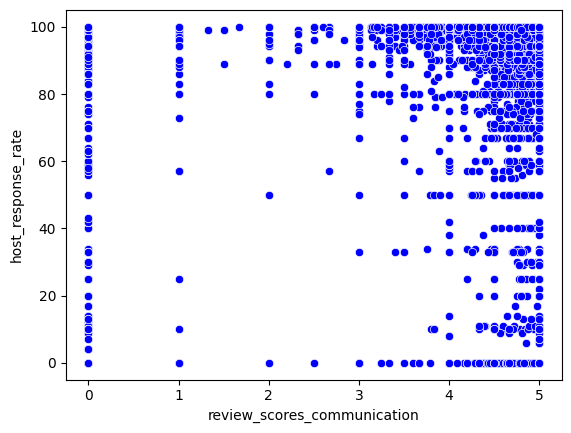

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_communication', y='host_response_rate', color="blue", data=data2)

In [ ]:
def func1(x, a, b, c):
  return  a*x**2 + b*x + c

In [ ]:
parametros1, covs= curve_fit(func1, data2['review_scores_communication'], data2['host_response_rate'])

In [ ]:
parametros1

array([ 0.5411386 , -0.63917788, 85.84894496])

In [ ]:
y_pred1 = func1(x1, *parametros1)

/tmp/ipython-input-950816638.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-950816638.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y_pred1,'bo', label="y-predecida", color= "red")


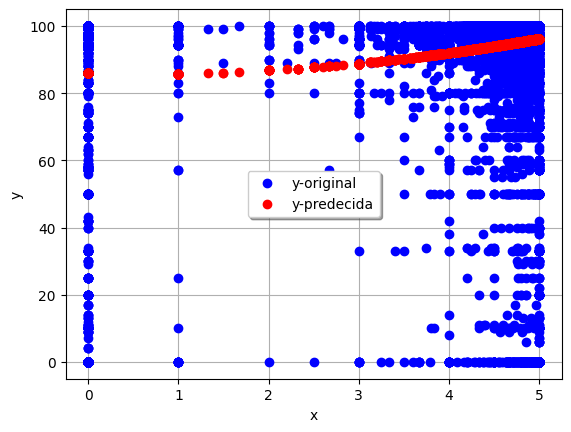

In [ ]:
plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
plt.plot(x1, y_pred1,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo1 = r2_score(y1, y_pred1)
R2_Modelo1

0.03674780093885954

In [ ]:
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.19169715944389876)

Modelo 2

In [ ]:
Vars_Indep2= data2[['availability_30']]
Var_Dep2= data2['host_response_rate']

In [ ]:
x2= Vars_Indep2
y2= Var_Dep2

In [ ]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [ ]:
model2.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [ ]:
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.010231560638745085

In [ ]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.10115117714957689)

<Axes: xlabel='availability_30', ylabel='host_response_rate'>

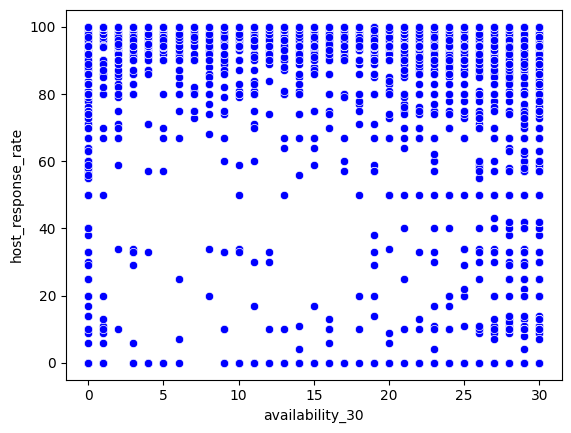

In [ ]:
from turtle import color
sns.scatterplot(x='availability_30', y='host_response_rate', color="blue", data=data2)

In [ ]:
def func2(x, a, b, c):
  return  a*x**2 + b*x + c

In [ ]:
parametros2, covs= curve_fit(func1, data2['availability_30'], data2['host_response_rate'])

In [ ]:
parametros2

array([-3.24551462e-02,  7.91090468e-01,  9.41060408e+01])

In [ ]:
y_pred2 = func2(x2, *parametros2)

In [ ]:
R2_Modelo2 = r2_score(y2, y_pred2)
R2_Modelo2

0.03480984734901715

In [ ]:
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(0.1865739728606784)

/tmp/ipython-input-1253850605.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1253850605.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y_pred2,'bo', label="y-predecida", color= "red")


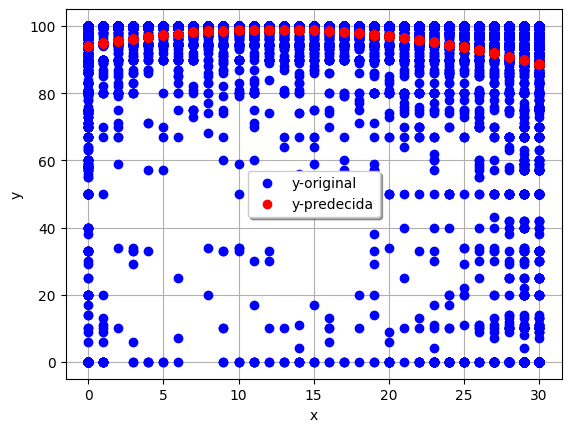

In [ ]:
plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
plt.plot(x2, y_pred2,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Host acceptance rate

Modelo 1

In [ ]:
Vars_Indep3= data2[['estimated_occupancy_l365d']]
Var_Dep3= data2['host_acceptance_rate']

In [ ]:
x3= Vars_Indep3
y3= Var_Dep3

In [ ]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [ ]:
model3.fit(X=Vars_Indep3, y=Var_Dep3)

LinearRegression()

In [ ]:
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.10105297357579679

In [ ]:
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.3178883036159034)

<Axes: xlabel='estimated_occupancy_l365d', ylabel='host_acceptance_rate'>

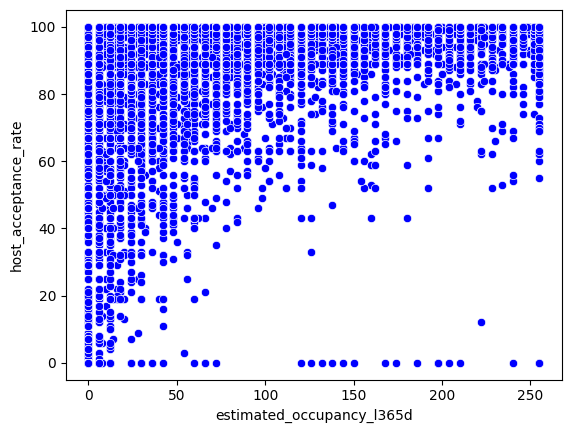

In [ ]:
from turtle import color
sns.scatterplot(x='estimated_occupancy_l365d', y='host_acceptance_rate', color="blue", data=data2)

In [ ]:
def func3(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros3, covs= curve_fit(func3, data2['estimated_occupancy_l365d'], data2['host_acceptance_rate'])

/tmp/ipython-input-1815951433.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros3, covs= curve_fit(func3, data2['estimated_occupancy_l365d'], data2['host_acceptance_rate'])


In [ ]:
parametros3

array([-20.76671062, 517.26512293,  94.25592344])

In [ ]:
y_pred3 = func3(x3, *parametros3)

/tmp/ipython-input-531067844.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-531067844.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y_pred3,'bo', label="y-predecida", color= "red")


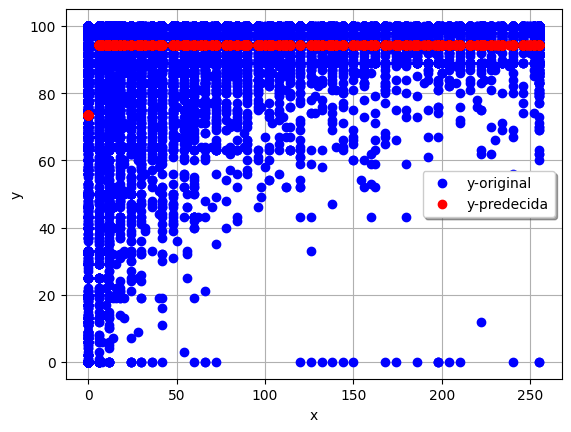

In [ ]:
plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
plt.plot(x3, y_pred3,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo3 = r2_score(y3, y_pred3)
R2_Modelo3

0.156583160346645

In [ ]:
R3 = np.sqrt(R2_Modelo3)
R3

np.float64(0.3957059013290615)

Modelo 2

In [ ]:
Vars_Indep4= data2[['number_of_reviews']]
Var_Dep4= data2['host_acceptance_rate']

In [ ]:
x4= Vars_Indep4
y4= Var_Dep4

In [ ]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [ ]:
model4.fit(X=Vars_Indep4, y=Var_Dep4)

LinearRegression()

In [ ]:
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.03903050368433392

In [ ]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.19756139219071603)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

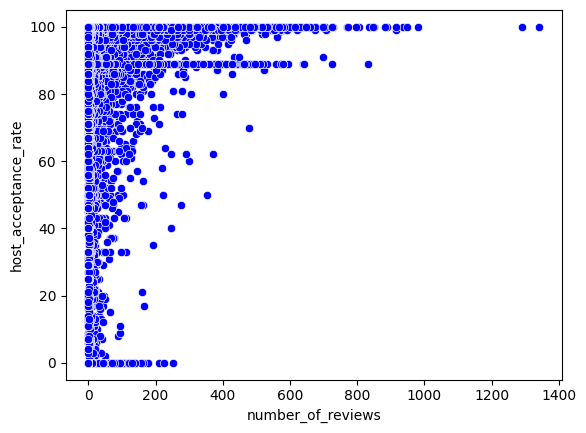

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=data2)

In [ ]:
def func4(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros4, covs= curve_fit(func4, data2['number_of_reviews'], data2['host_acceptance_rate'])

/tmp/ipython-input-2588752481.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs= curve_fit(func4, data2['number_of_reviews'], data2['host_acceptance_rate'])


In [ ]:
parametros4

array([-15.52217597,  27.72846122,  90.8430476 ])

In [ ]:
y_pred4 = func3(x4, *parametros4)

/tmp/ipython-input-4208943099.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-4208943099.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y_pred4,'bo', label="y-predecida", color= "red")


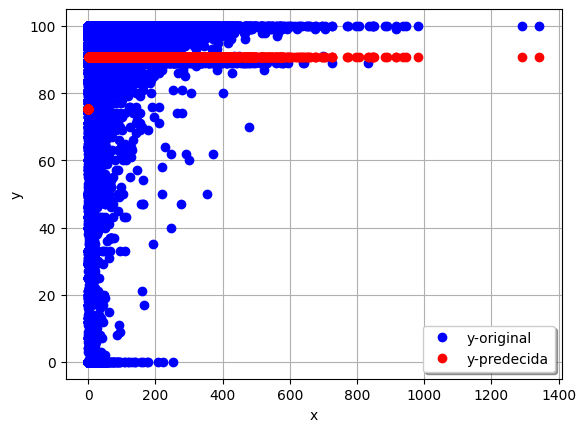

In [ ]:
plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
plt.plot(x4, y_pred4,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo4 = r2_score(y4, y_pred4)
R2_Modelo4

0.05068932391394354

In [ ]:
R4 = np.sqrt(R2_Modelo4)
R4

np.float64(0.22514289665442155)

Host total listings count

Modelo 1

In [ ]:
Vars_Indep5= data2[['availability_365']]
Var_Dep5= data2['host_total_listings_count']

In [ ]:
x5= Vars_Indep5
y5= Var_Dep5

In [ ]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [ ]:
model5.fit(X=Vars_Indep5, y=Var_Dep5)

LinearRegression()

In [ ]:
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.008558379056972432

In [ ]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.09251150770024469)

<Axes: xlabel='availability_365', ylabel='host_total_listings_count'>

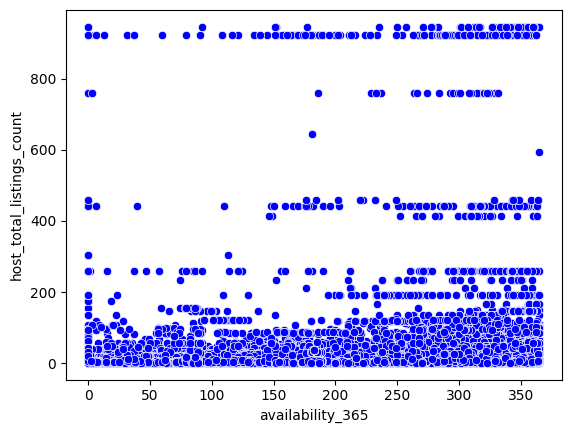

In [ ]:
from turtle import color
sns.scatterplot(x='availability_365', y='host_total_listings_count', color="blue", data=data2)

In [ ]:
def func5(x, a, b,c):
  from numpy import exp
  return a*x**2 + b*x + c

In [ ]:
parametros5, covs= curve_fit(func5, data2['availability_365'], data2['host_total_listings_count'])

In [ ]:
parametros5

array([1.15821679e-04, 3.96872557e-02, 1.47351555e+01])

In [ ]:
y_pred5 = func5(x5, *parametros5)

/tmp/ipython-input-4008522980.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-4008522980.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y_pred5,'bo', label="y-predecida", color= "red")


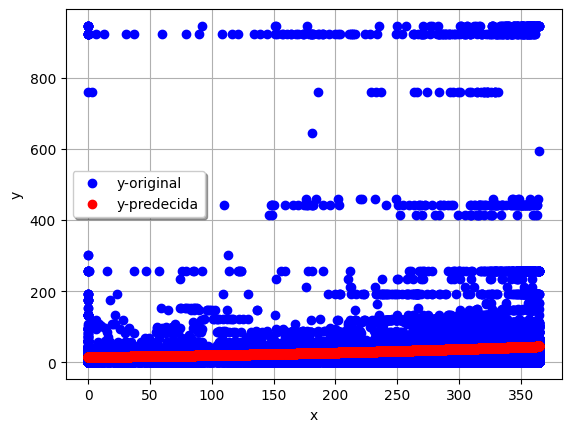

In [ ]:
plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
plt.plot(x5, y_pred5,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo5 = r2_score(y5, y_pred5)
R2_Modelo5

0.008708120554713705

In [ ]:
R5 = np.sqrt(R2_Modelo5)
R5

np.float64(0.09331731112025092)

Modelo 2

In [ ]:
Vars_Indep6= data2[['estimated_revenue_l365d']]
Var_Dep6= data2['host_total_listings_count']

In [ ]:
x6= Vars_Indep6
y6= Var_Dep6

In [ ]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [ ]:
model6.fit(X=Vars_Indep6, y=Var_Dep6)

LinearRegression()

In [ ]:
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.002404583414024608

In [ ]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.04903655181621775)

<Axes: xlabel='estimated_revenue_l365d', ylabel='host_total_listings_count'>

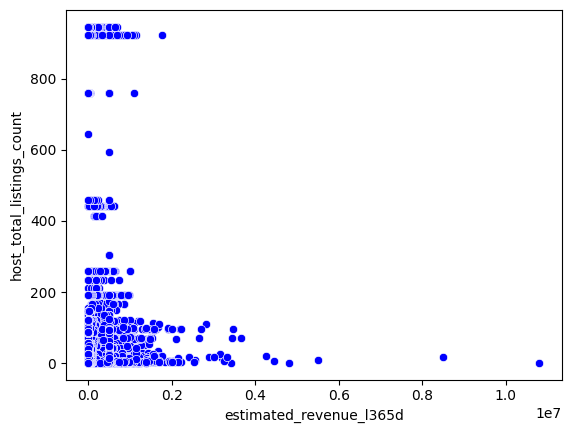

In [ ]:
from turtle import color
sns.scatterplot(x='estimated_revenue_l365d', y='host_total_listings_count', color="blue", data=data2)

In [ ]:
def func6(x, a, b,c):
  from numpy import exp
  return a*x**2 + b*x + c

In [ ]:
parametros6, covs= curve_fit(func6, data2['estimated_revenue_l365d'], data2['host_total_listings_count'])

In [ ]:
parametros6

array([-4.46398548e-12,  3.24841979e-05,  2.69121712e+01])

In [ ]:
y_pred6 = func5(x6, *parametros6)

/tmp/ipython-input-3315183476.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3315183476.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y_pred6,'bo', label="y-predecida", color= "red")


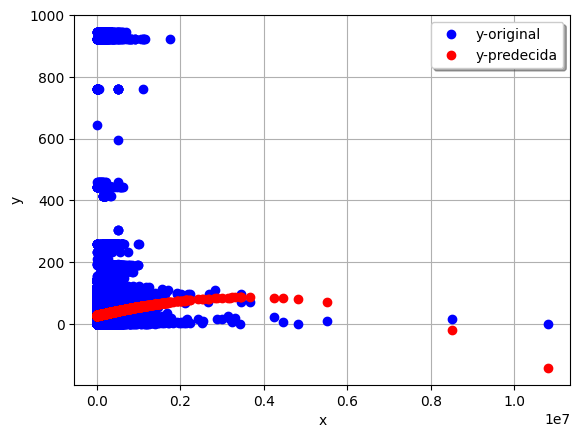

In [ ]:
plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
plt.plot(x6, y_pred6,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo6 = r2_score(y6, y_pred6)
R2_Modelo6

0.003292866329622446

In [ ]:
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.05738350224256485)

Accomodates

Modelo 1

In [ ]:
Vars_Indep7= data2[['calculated_host_listings_count_private_rooms']]
Var_Dep7= data2['accommodates']

In [ ]:
x7= Vars_Indep7
y7= Var_Dep7

In [ ]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [ ]:
model7.fit(X=Vars_Indep7, y=Var_Dep7)

LinearRegression()

In [ ]:
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.011956317699738706

In [ ]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.10934494821316029)

<Axes: xlabel='calculated_host_listings_count_private_rooms', ylabel='accommodates'>

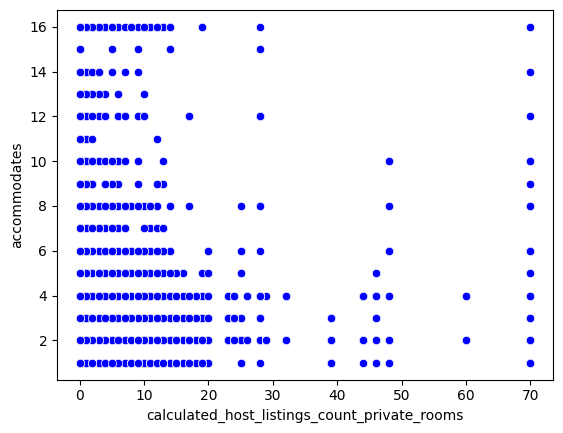

In [ ]:
from turtle import color
sns.scatterplot(x='calculated_host_listings_count_private_rooms', y='accommodates', color="blue", data=data2)

In [ ]:
def func7(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros7, covs= curve_fit(func7, data2['calculated_host_listings_count_private_rooms'], data2['accommodates'])

/tmp/ipython-input-2310001159.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros7, covs= curve_fit(func7, data2['calculated_host_listings_count_private_rooms'], data2['accommodates'])


In [ ]:
parametros7

array([ 1.52312648, 25.42171433,  2.46413129])

In [ ]:
y_pred7 = func7(x7, *parametros7)

/tmp/ipython-input-3568439789.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x7, y7, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3568439789.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x7, y_pred7,'bo', label="y-predecida", color= "red")


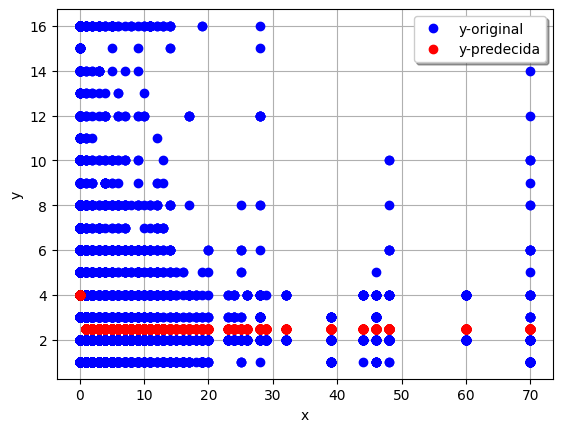

In [ ]:
plt.plot(x7, y7, 'bo', label="y-original", color= "blue")
plt.plot(x7, y_pred7,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo7 = r2_score(y7, y_pred7)
R2_Modelo7

0.10390954756553716

In [ ]:
R7 = np.sqrt(R2_Modelo7)
R7

np.float64(0.322350038879379)

Modelo 2

In [ ]:
Vars_Indep8= data2[['calculated_host_listings_count_entire_homes']]
Var_Dep8= data2['accommodates']

In [ ]:
x8= Vars_Indep8
y8= Var_Dep8

In [ ]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [ ]:
model8.fit(X=Vars_Indep8, y=Var_Dep8)

LinearRegression()

In [ ]:
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.010492603371287434

In [ ]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.10243340944871178)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='accommodates'>

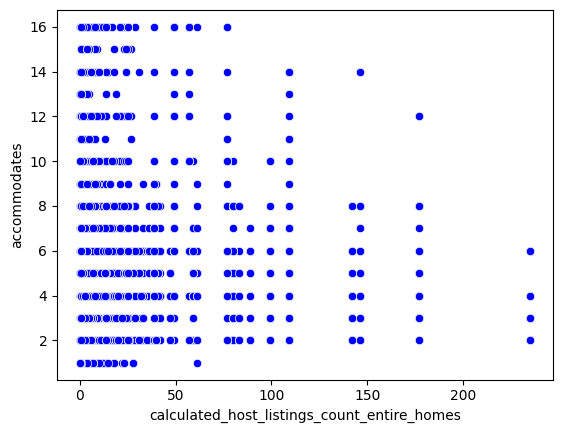

In [ ]:
from turtle import color
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='accommodates', color="blue", data=data2)

In [ ]:
def func8(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros8, covs= curve_fit(func8, data2['calculated_host_listings_count_entire_homes'], data2['accommodates'])

In [ ]:
parametros8

array([-1.92001662,  1.84287009,  3.9133705 ])

In [ ]:
y_pred8 = func8(x8, *parametros8)

/tmp/ipython-input-4157639839.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x8, y8, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-4157639839.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x8, y_pred8,'bo', label="y-predecida", color= "red")


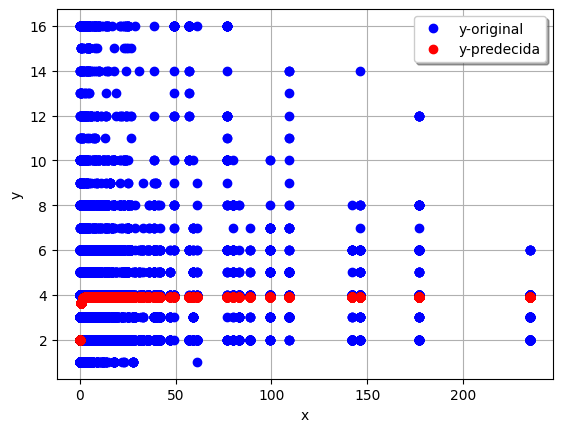

In [ ]:
plt.plot(x8, y8, 'bo', label="y-original", color= "blue")
plt.plot(x8, y_pred8,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo8 = r2_score(y8, y_pred8)
R2_Modelo8

0.11581987456623699

In [ ]:
R8 = np.sqrt(R2_Modelo8)
R8

np.float64(0.34032319134351835)

Reviews per month

Modelo 1

In [ ]:
Vars_Indep9= data2[['number_of_reviews_ly']]
Var_Dep9= data2['reviews_per_month']

In [ ]:
x9= Vars_Indep9
y9= Var_Dep9

In [ ]:
from sklearn.linear_model import LinearRegression
model9= LinearRegression()

In [ ]:
model9.fit(X=Vars_Indep9, y=Var_Dep9)

LinearRegression()

In [ ]:
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.024681671636069824

In [ ]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.15710401534037832)

<Axes: xlabel='number_of_reviews_ly', ylabel='reviews_per_month'>

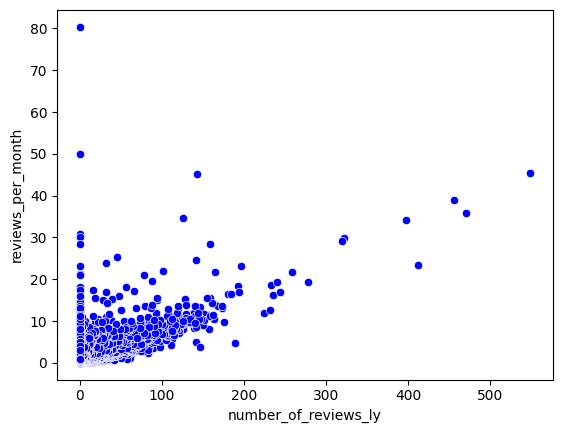

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews_ly', y='reviews_per_month', color="blue", data=data2)

In [ ]:
def func9(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros9, covs= curve_fit(func9, data2['number_of_reviews_ly'], data2['reviews_per_month'])

/tmp/ipython-input-3375661450.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros9, covs= curve_fit(func9, data2['number_of_reviews_ly'], data2['reviews_per_month'])


In [ ]:
parametros9

array([ 17.31784052, 202.88823068,   2.0177568 ])

In [ ]:
y_pred9 = func9(x9, *parametros9)

/tmp/ipython-input-3455042705.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x9, y9, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3455042705.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x9, y_pred9,'bo', label="y-predecida", color= "red")


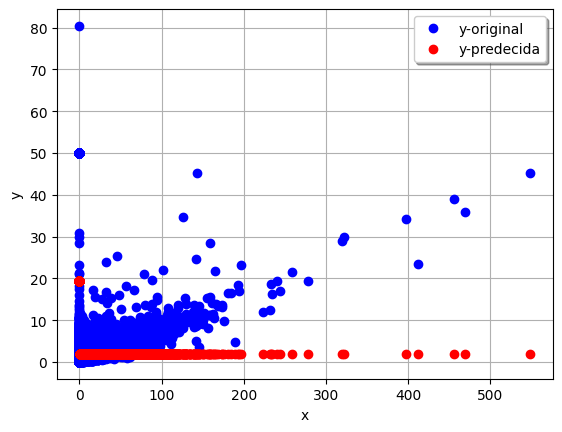

In [ ]:
plt.plot(x9, y9, 'bo', label="y-original", color= "blue")
plt.plot(x9, y_pred9,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo9 = r2_score(y9, y_pred9)
R2_Modelo9

0.25733326078326557

In [ ]:
R9 = np.sqrt(R2_Modelo9)
R9

np.float64(0.5072802586177246)

Modelo 2

In [ ]:
Vars_Indep10= data2[['number_of_reviews_ltm']]
Var_Dep10= data2['reviews_per_month']

In [ ]:
x10= Vars_Indep10
y10= Var_Dep10

In [ ]:
from sklearn.linear_model import LinearRegression
model10= LinearRegression()

In [ ]:
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [ ]:
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.026384583699838315

In [ ]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.16243332078067702)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

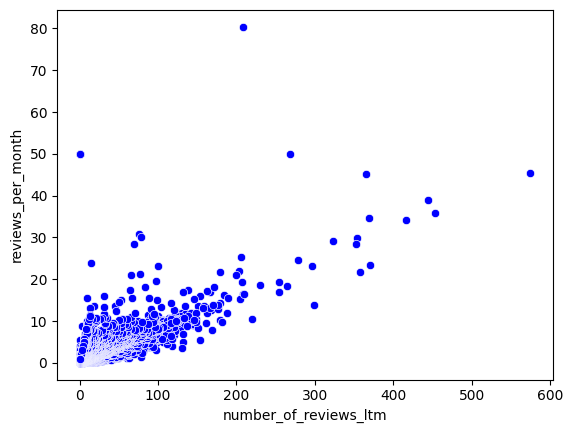

In [ ]:
from turtle import color
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=data2)

In [ ]:
def func10(x, a, b,c):
  from numpy import exp
  return a*exp(-b*x) + c

In [ ]:
parametros10, covs= curve_fit(func10, data2['number_of_reviews_ltm'], data2['reviews_per_month'])

/tmp/ipython-input-4289759726.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros10, covs= curve_fit(func10, data2['number_of_reviews_ltm'], data2['reviews_per_month'])


In [ ]:
parametros10

array([ 22.65413781, 228.05497739,   2.07755898])

In [ ]:
y_pred10 = func10(x10, *parametros10)

/tmp/ipython-input-36238597.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x10, y10, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-36238597.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x10, y_pred10,'bo', label="y-predecida", color= "red")


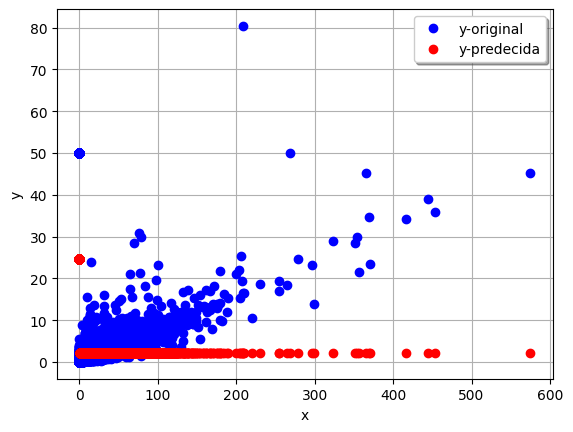

In [ ]:
plt.plot(x10, y10, 'bo', label="y-original", color= "blue")
plt.plot(x10, y_pred10,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo10 = r2_score(y10, y_pred10)
R2_Modelo10

0.3756277893225176

In [ ]:
R10 = np.sqrt(R2_Modelo10)
R10

np.float64(0.6128848091791129)

Price

Modelo 1

In [ ]:
Vars_Indep11= data2[['estimated_revenue_l365d']]
Var_Dep11= data2['price']

In [ ]:
x11= Vars_Indep11
y11= Var_Dep11

In [ ]:
from sklearn.linear_model import LinearRegression
model11= LinearRegression()

In [ ]:
model11.fit(X=Vars_Indep11, y=Var_Dep11)

LinearRegression()

In [ ]:
coef_Deter11=model11.score(X=Vars_Indep11, y=Var_Dep11)
coef_Deter11

0.01219991020256228

In [ ]:
coef_Correl11=np.sqrt(coef_Deter11)
coef_Correl11

np.float64(0.11045320367722378)

<Axes: xlabel='estimated_revenue_l365d', ylabel='price'>

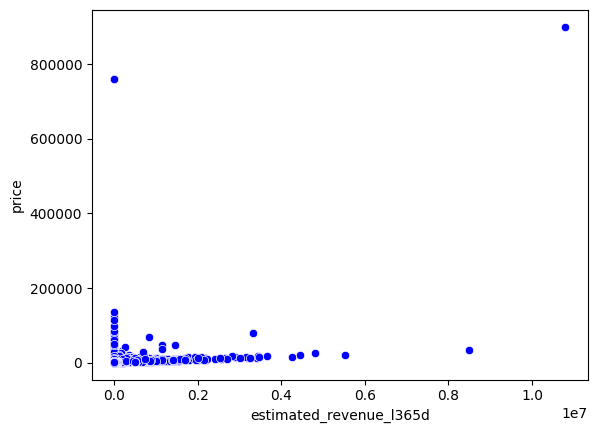

In [ ]:
from turtle import color
sns.scatterplot(x='estimated_revenue_l365d', y='price', color="blue", data=data2)

In [ ]:
def func11(x, a, b,c):
  from numpy import exp
  return a*x**2 + b*x + c

In [ ]:
parametros11, covs= curve_fit(func11, data2['estimated_revenue_l365d'], data2['price'])

In [ ]:
parametros11

array([ 5.64009853e-09, -5.03914831e-03,  2.35246048e+03])

In [ ]:
y_pred11 = func11(x11, *parametros11)

/tmp/ipython-input-2963486633.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x11, y11, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2963486633.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x11, y_pred11,'bo', label="y-predecida", color= "red")


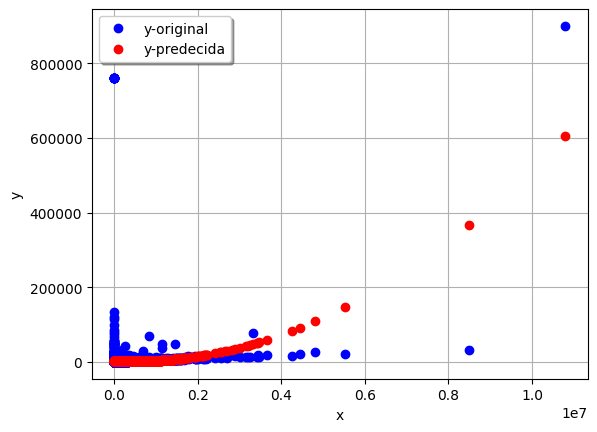

In [ ]:
plt.plot(x11, y11, 'bo', label="y-original", color= "blue")
plt.plot(x11, y_pred11,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo11 = r2_score(y11, y_pred11)
R2_Modelo11

0.07330667067002083

In [ ]:
R11 = np.sqrt(R2_Modelo11)
R11

np.float64(0.27075204647429874)

Modelo 2

In [ ]:
Vars_Indep12= data2[['review_scores_value']]
Var_Dep12= data2['price']

In [ ]:
x12= Vars_Indep12
y12= Var_Dep12

In [ ]:
from sklearn.linear_model import LinearRegression
model12= LinearRegression()

In [ ]:
model12.fit(X=Vars_Indep12, y=Var_Dep12)

LinearRegression()

In [ ]:
coef_Deter12=model12.score(X=Vars_Indep12, y=Var_Dep12)
coef_Deter12

0.004035277429627837

In [ ]:
coef_Correl12=np.sqrt(coef_Deter12)
coef_Correl12

np.float64(0.06352383355582247)

<Axes: xlabel='review_scores_value', ylabel='price'>

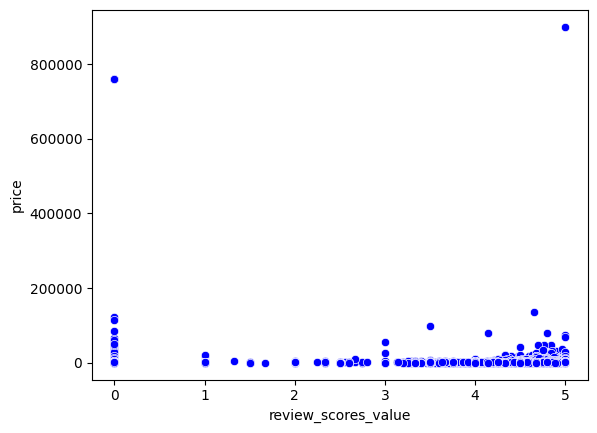

In [ ]:
from turtle import color
sns.scatterplot(x='review_scores_value', y='price', color="blue", data=data2)

In [ ]:
def func12(x, a, b,c):
  from numpy import exp
  return a*x**2 + b*x + c

In [ ]:
parametro12, covs= curve_fit(func12, data2['review_scores_value'], data2['price'])

In [ ]:
parametro12

array([  276.4799454 , -2032.53890665,  4949.96865361])

In [ ]:
y_pred12 = func12(x12, *parametros12)

/tmp/ipython-input-4288779966.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x12, y12, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-4288779966.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x12, y_pred12,'bo', label="y-predecida", color= "red")


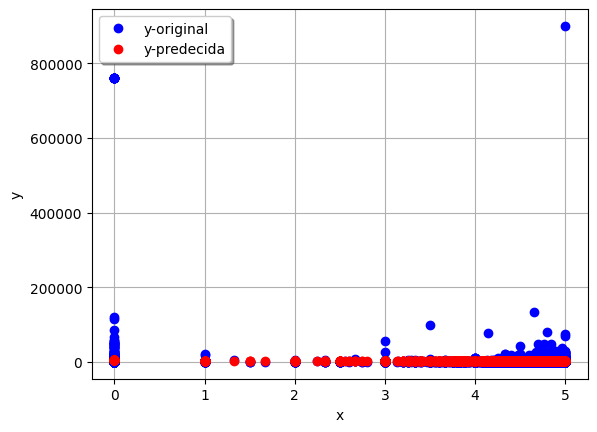

In [ ]:
plt.plot(x12, y12, 'bo', label="y-original", color= "blue")
plt.plot(x12, y_pred12,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
R2_Modelo12 = r2_score(y12, y_pred12)
R2_Modelo12

0.004355661957617385

In [ ]:
R12 = np.sqrt(R2_Modelo12)
R12

np.float64(0.0659974390231726)